<img src="https://www.uhb.edu.sa/Lists/MemberShip/Attachments/681/PictureProfile-Logo.jpg" width="300" height="100">

# <font color = green > Ahmed Adnan : 2200000997 </font>
   <font color = green > Department of Data science  </font>



   # <font color = green > DSC 307 Cource Project 

## <font color = green > The aim of my analysis is to find out the factors affecting the rise in land prices and to see if there is a relationship in the rise in land prices with projects in the Kingdom of Saudi Arabia. </font>

## Datasets

- The data I used in this project
 <ol>
    <li> aqar dataset
    <li> saudi projects dataset
  </ol>      
- Both sets of data were published over a similar period time

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns
import sklearn as sk
from vega_datasets import data 
df = pd.read_csv("aqardata_2.csv")
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import scipy.stats
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import sklearn.metrics as sm
from math import sqrt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

import os

##  aqar dataset information 

<img src="https://assets.aqar.fm/icons/AqarLogoH-colored.svg" width="500" height="520">

This dataset has been scrapped off sa.aqar.fm to obtain land information such as price, size, street width, and locations. The uncleaned dataset scrapped 4347 rows, but seems like 1395 were duplicated and deleted. Leaving us with 2952 rows. The majority of the data is unfortunately lands based in Riyadh, but there are a good number of lands in Jeddah and Khobar. The dataset is set in Arabia, and decided to keep it that way to keep the integrity of the data. However, the street width, land size, and price have all been converted to numerical values, leaving some of those values as null if couldn't convert them.

In [2]:
df

mainlocation  sublocation      neighborhood   frontage        purpose  \
0           الرياض   غرب الرياض       حي ظهرة لبن       شمال           سكني   
1            بريدة          NaN           حي مشعل        غرب            NaN   
2            الخبر          NaN         حي الحمرا        غرب          تجاري   
3            الخبر          NaN  حي الحزام الاخضر        شرق            NaN   
4            بريدة          NaN         حي الرحاب  جنوب غربي            NaN   
...            ...          ...               ...        ...            ...   
2946        الرياض  جنوب الرياض           حي طيبة  شمال غربي           سكني   
2947  رياض الخبراء          NaN         حي النزهة  شمال غربي  سكني أو تجاري   
2948         بريدة          NaN          حي الحمر        شرق           سكني   
2949        الرياض  شمال الرياض         حي الملقا       جنوب           سكني   
2950        الزلفي          NaN       حي الصناعية       شمال           سكني   

      streetwidth    size  Pricepm  
0            20.0     727     1800  
1            15.0     450      950  
2           100.0    1450     3500  
3            15.0     440     2700  
4            40.0     784      950  
...           ...     ...      ...  
2946         20.0     354     1200  
2947        100.0  143875      125  
2948         15.0     934      550  
2949         15.0     832     2900  
2950         20.0    1200      166  

[2951 rows x 8 columns]

In [3]:
df.info() # showing some information about the data like the shape of data and name of each column and the type of this column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2951 entries, 0 to 2950
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mainlocation  2951 non-null   object 
 1   sublocation   2276 non-null   object 
 2   neighborhood  2951 non-null   object 
 3   frontage      2951 non-null   object 
 4   purpose       2604 non-null   object 
 5   streetwidth   2948 non-null   float64
 6   size          2951 non-null   int64  
 7   Pricepm       2951 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 184.6+ KB


In [4]:
df.shape # the shbe of data and we have 2951 Rows and 8 column

(2951, 8)

# EDA (Exploratory data analysis)

In [5]:
df.isnull().sum()# Shows the total missing data in each column

mainlocation      0
sublocation     675
neighborhood      0
frontage          0
purpose         347
streetwidth       3
size              0
Pricepm           0
dtype: int64

- Here we have top columns that have missing values in sublocation and purpose

In [6]:
df.nunique() # Return unique values in each column 

mainlocation     45
sublocation       7
neighborhood    288
frontage         10
purpose           4
streetwidth      43
size            879
Pricepm         659
dtype: int64

In [7]:
df['sublocation'].unique() # return unique value of sublocation column 

array(['غرب الرياض', nan, 'شمال الرياض', 'شمال جدة', 'جنوب الرياض',
       'شرق الرياض', 'جنوب جدة', 'وسط الرياض'], dtype=object)

In [8]:
df['purpose'].unique() # return unique value of sublocation column

array(['سكني', nan, 'تجاري', 'سكني أو تجاري', 'غير محدد'], dtype=object)

In [9]:
df['sublocation'].value_counts() # It shows me the number of values in the column, as well as each type and the number of its frequency

شمال الرياض    1188
شرق الرياض      482
غرب الرياض      337
شمال جدة        171
جنوب الرياض      81
وسط الرياض       12
جنوب جدة          5
Name: sublocation, dtype: int64

In [10]:
df['mainlocation'].value_counts()

الرياض                            2100
الخبر                              242
جدة                                176
الدرعية                             64
المدينة المنورة                     56
بريدة                               55
الدمام                              40
الهفوف                              26
الزلفي                              25
مكة المكرمة                         20
جازان                               17
ثادق                                14
الرس                                13
ابها                                11
الخرج                               10
رابغ                                10
المزاحمية                            7
بيش                                  6
احد رفيده                            6
ثول                                  6
عنيزة                                5
ابو عريش                             4
المجمعة                              3
الظهران                              3
الطائف                               3
سكاكا                    

In [11]:
df['neighborhood'].value_counts()

حي الملقا     313
حي النرجس     197
حي بنبان      104
حي حطين        93
حي عرقة        85
             ... 
حي الضباط       1
حي شويهة        1
حي المهدج       1
حي الرونة       1
حي الزرقاء      1
Name: neighborhood, Length: 288, dtype: int64

In [12]:
df['frontage'].value_counts()

جنوب         488
شمال         484
شرق          479
غرب          416
3 شوارع      266
شمال شرقي    213
شمال غربي    174
جنوب شرقي    173
جنوب غربي    133
4 شوارع      125
Name: frontage, dtype: int64

In [13]:
df['purpose'].value_counts() # It shows me the number of values in the column, as well as each type and the number of its frequency

سكني             2005
تجاري             329
سكني أو تجاري     268
غير محدد            2
Name: purpose, dtype: int64

In [14]:
df.describe(include=object)

mainlocation  sublocation neighborhood frontage purpose
count          2951         2276         2951     2951    2604
unique           45            7          288       10       4
top          الرياض  شمال الرياض    حي الملقا     جنوب    سكني
freq           2100         1188          313      488    2005

- Statistics on land prices and specifications  

# data preprocessing and data cleaning

In [15]:
df.isnull().sum()

mainlocation      0
sublocation     675
neighborhood      0
frontage          0
purpose         347
streetwidth       3
size              0
Pricepm           0
dtype: int64

In [16]:
df.loc[df["mainlocation"]=="الدرعية","sublocation"]="شمال الرياض"
df.loc[df["mainlocation"]=="الخبر","sublocation"]="جنوب الشرقية"
df.loc[df["mainlocation"]=="الدمام","sublocation"]="شمال الشرقية"
df.loc[df["mainlocation"]=="بريدة","sublocation"]="شرق القصيم"
df.loc[df["mainlocation"]=="الرس","sublocation"]="غرب القصيم"
df.loc[df["mainlocation"]=="رابغ","sublocation"]="شمال مكة المكرمة"
df.loc[df["mainlocation"]=="المزاحمية","sublocation"]="غرب الرياض"  
df.loc[df["mainlocation"]=="الزلفي","sublocation"]="شمال الرياض"
df.loc[df["mainlocation"]=="الخرج","sublocation"]="جنوب شرق الرياض"
df.loc[df["mainlocation"]=="الهفوف","sublocation"]="غرب الشرقية"
df.loc[df["mainlocation"]=="ثادق","sublocation"]="شمال غرب الرياض"
df.loc[df["mainlocation"]=="ثول","sublocation"]="شمال جدة"
df.loc[df["mainlocation"]=="عنيزة","sublocation"]="جنوب القصيم"

In [17]:
df["sublocation"].fillna(df.mainlocation,inplace=True)

- The goal is to make mainlocation that does not have a sublocation to fill it with the correct value

In [18]:
df.isnull().sum()

mainlocation      0
sublocation       0
neighborhood      0
frontage          0
purpose         347
streetwidth       3
size              0
Pricepm           0
dtype: int64

In [19]:
df["purpose"].value_counts(dropna=False)

سكني             2005
NaN               347
تجاري             329
سكني أو تجاري     268
غير محدد            2
Name: purpose, dtype: int64

In [20]:
df["purpose"].fillna("غير محدد", inplace = True)

- We have 347 missing values in the purpose column and fill it with ( غير محدد /undefined )

In [21]:
df.isnull().sum()

mainlocation    0
sublocation     0
neighborhood    0
frontage        0
purpose         0
streetwidth     3
size            0
Pricepm         0
dtype: int64

In [22]:
df["streetwidth"].fillna(df["streetwidth"].mean(), inplace = True)

- We have 3 missing values in the street width column and they are filled with mean 

In [23]:
df.isnull().sum()

mainlocation    0
sublocation     0
neighborhood    0
frontage        0
purpose         0
streetwidth     0
size            0
Pricepm         0
dtype: int64

## Describe Numeric Features

In [24]:
df.describe()

streetwidth          size       Pricepm
count  2951.000000  2.951000e+03   2951.000000
mean     24.691995  1.040184e+04   2624.025754
std      15.200985  2.033230e+05   2970.544618
min       1.000000  8.100000e+01      1.000000
25%      15.000000  5.750000e+02   1200.000000
50%      20.000000  8.250000e+02   2600.000000
75%      30.000000  1.350000e+03   3500.000000
max     100.000000  1.000000e+07  83333.000000

- Statistics on streetwidth, size and price of the land. We can note the lowest and highest price, the average, and also the size of the land and the width of the street.

In [25]:
df.loc[df['Pricepm']==83333]

mainlocation sublocation neighborhood frontage purpose  streetwidth  \
2013          جدة    شمال جدة   حي الزهراء     جنوب    سكني         30.0   

      size  Pricepm  
2013   600    83333

- The land that has the highest price
 - It means the price of the land 49,999,800 SR

In [26]:
df.loc[df['Pricepm']==1]

mainlocation sublocation neighborhood   frontage        purpose  \
1885       الرياض  غرب الرياض  حي ظهرة لبن  شمال غربي  سكني أو تجاري   

      streetwidth  size  Pricepm  
1885         40.0  1200        1

- The land that has the lowest price

# data visualization

<AxesSubplot:xlabel='Pricepm', ylabel='Density'>

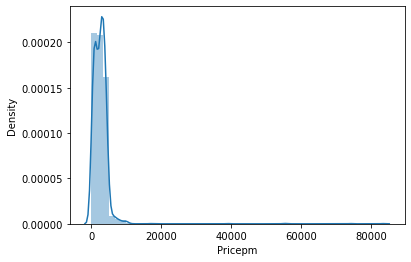

In [27]:
sns.distplot(df["Pricepm"])

- The density of land prices 

<AxesSubplot:xlabel='streetwidth', ylabel='Density'>

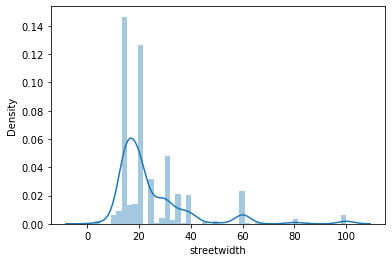

In [28]:
sns.distplot(df["streetwidth"])

- Street width density ranges from 15 to 20

array([[<AxesSubplot:title={'center':'streetwidth'}>,
        <AxesSubplot:title={'center':'size'}>],
       [<AxesSubplot:title={'center':'Pricepm'}>, <AxesSubplot:>]],
      dtype=object)

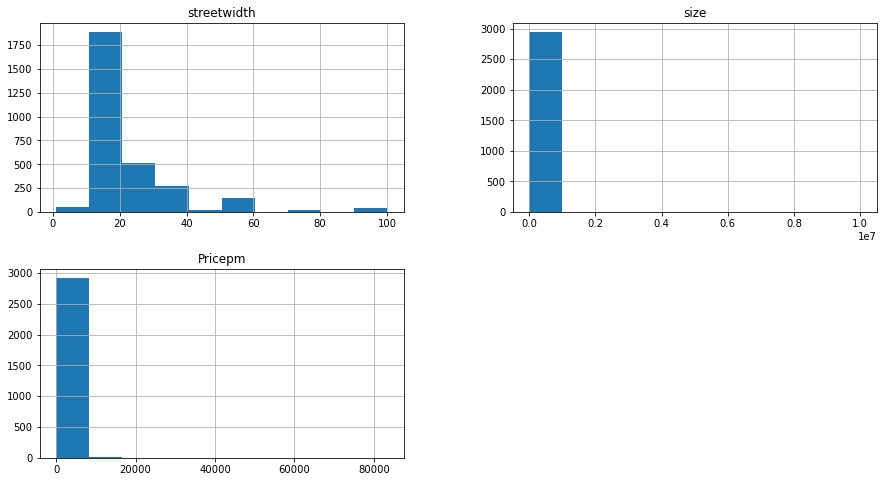

In [29]:
df.hist(figsize=(15,8))

- histogram for streetwidth , size and Pricepm

In [30]:
sp=alt.Chart(df).transform_calculate(
    
).mark_point().encode(
    x='streetwidth',
    y='Pricepm',
    color='purpose',
    tooltip=['mainlocation','neighborhood:N', 'size:N','Pricepm:N']
).interactive().properties(title="streetwidth VS Pricepm ",width=350,height=260)





sp

alt.Chart(...)

- We can see the relationship of streetwidth with Pricepm, and it turns out that the lands that have a width between 10 and 20 are the most purchased, and the most of them were residential lands

In [31]:
sa=alt.Chart(df).mark_bar().encode(
    x='mainlocation',
    y='sum(Pricepm)',
    color='purpose').interactive().properties(title="Price per meter for each mainlocation and purpose")


ssu=alt.Chart(df[ df["mainlocation"]=="الرياض"  ]).mark_bar().encode(
    x='sublocation',
    y='sum(Pricepm)',
    color='purpose').interactive().properties(title="Prices per sublocation and purpose")



sa|ssu

alt.HConcatChart(...)

- The graph shows us that the city of Riyadh got the most land prices among the rest of the regions in the Kingdom

- And in the bar chart, it is clear that most of the land was in the North of Riyadh, and it was the most residential

In [32]:
pi = pd.DataFrame(df.loc[df['mainlocation']=='الرياض'], columns = ['sublocation', 'Pricepm'])
pi

sublocation  Pricepm
0      غرب الرياض     1800
5     شمال الرياض     2000
11    جنوب الرياض     1500
12     شرق الرياض     2500
15     شرق الرياض      300
...           ...      ...
2939  شمال الرياض     3000
2942   غرب الرياض     1100
2945  شمال الرياض     1630
2946  جنوب الرياض     1200
2949  شمال الرياض     2900

[2100 rows x 2 columns]

In [33]:
pi2 = pi[['sublocation','Pricepm']].groupby(['sublocation']).sum()
pi2['percent']=round( (pi2['Pricepm'] / pi2['Pricepm'].sum()) * 100 ,2)
pi2.reset_index(inplace=True)
pi2

sublocation  Pricepm  percent
0  جنوب الرياض    85921     1.37
1   شرق الرياض  1159326    18.50
2  شمال الرياض  4253764    67.87
3   غرب الرياض   730166    11.65
4   وسط الرياض    38006     0.61

In [34]:
base = alt.Chart(pi2).mark_arc().encode(
    theta=alt.Theta("mean(Pricepm):Q", stack=True),
    color=alt.Color("sublocation:N")
).properties(title="PieChart",width=600,height=500)

pie = base.mark_arc(outerRadius=150)
text = base.mark_text(radius=200, size=15).encode(text="percent:N")
pie + text


alt.LayerChart(...)

- This percentage of land prices and where they are located shows us that most of the lands were in the north of Riyadh

# saudi projects dataset information
<img src="https://upload.wikimedia.org/wikipedia/en/thumb/f/f5/Saudi_Vision_2030_logo.svg/1200px-Saudi_Vision_2030_logo.svg.png" width="300" height="100"> 



- An astonishing volume and variety of major construction and fit-out projects are currently underway in Saudi Arabia, realizing goal set out by the Vision 2030 national development plan.

In [35]:
data = pd.read_csv("Saudi_projects_dataset.csv")

In [36]:
data

sectors  sector_budgets  sector_num_projects  \
0      تجاري   1058790791316                  902   
1      تجاري   1058790791316                  902   
2      تجاري   1058790791316                  902   
3      تجاري   1058790791316                  902   
4      تجاري   1058790791316                  902   
...      ...             ...                  ...   
2177     صحي    549859453510                  150   
2178     صحي    549859453510                  150   
2179     صحي    549859453510                  150   
2180     صحي    549859453510                  150   
2181     صحي    549859453510                  150   

                                           name_project  \
0     برج غرفة الشرقية الاستثماري – Asharqia Chamber...   
1     مقر برايس ووتر هاوس كوبرز – PWC Headquarter   ...   
2     مقر المدفوعات السعودية – Saudi Payment Headqua...   
3     الاحساء ستريب مول – Ahsa Strip Mall           ...   
4         برج الدايل – Al-Dailh Tower                     
...                                                 ...   
2177          بوابة مكة – Makkah Gate                     
2178  مدينة المعرفة الاقتصادية – Knowledge Economic ...   
2179  مستشفى د. سليمان الحبيب بالخبر – Dr. Sulaiman ...   
2180  مستشفى الصحة النفسية لعلاج الادمان والإضطراب ا...   
2181  مستشفى طب وجراحة الأعصاب – NGHA Neuroscience C...   

                                           type_project  budget_project  \
0                                                 تجاري    3.350000e+08   
1                                           تجاري, سكني             NaN   
2                                           تجاري, سكني    1.178000e+09   
3                                                 تجاري             NaN   
4                                          فندقي, تجاري    1.200000e+08   
...                                                 ...             ...   
2177  البنية التحتية, ترفيهي/سياحي, تعليمي, حكومي, س...             NaN   
2178  فندقي, البنية التحتية, تجاري, ترفيهي/سياحي, تع...    2.500000e+10   
2179                                         تجاري, صحي    1.000000e+09   
2180                                         حكومي, صحي             NaN   
2181                                         حكومي, صحي             NaN   

     startday_project enddate_project        area_project  \
0          03-07-2019      31-12-2021      7,752 متر مربع   
1          01-01-2010             NaN      8,000 متر مربع   
2          01-01-2009      31-12-2014     19,500 متر مربع   
3                 NaN             NaN     19,888 متر مربع   
4          01-06-2019      31-03-2022      3,651 متر مربع   
...               ...             ...                 ...   
2177       05-03-2011             NaN  83,000,000 مترمربع   
2178       15-04-2009      15-04-2024     4800000 مترمربع   
2179       01-06-2015      01-06-2019     30.000 متر مربع   
2180              NaN             NaN                 NaN   
2181       01-07-2014             NaN      70,000 مترمربع   

                              region_project status_project  
0                    المنطقة الشرقية, الدمام    تحت الإنشاء  
1                       منطقة الرياض, الرياض    تحت الإنشاء  
2                       منطقة الرياض, الرياض          مكتمل  
3                   المنطقة الشرقية, الأحساء       معلن عنه  
4                     منطقة مكة المكرمة, جدة    تحت الإنشاء  
...                                      ...            ...  
2177          مكة المكرمة, منطقة مكة المكرمة       معلن عنه  
2178  منطقة المدينة المنورة, المدينة المنورة    تحت الإنشاء  
2179                  المنطقة الشرقية, الخبر          متأخر  
2180                    منطقة الرياض, الرياض    تحت الإنشاء  
2181                  منطقة مكة المكرمة, جدة    تحت الإنشاء  

[2182 rows x 11 columns]

## EDA

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sectors              2182 non-null   object 
 1   sector_budgets       2182 non-null   int64  
 2   sector_num_projects  2182 non-null   int64  
 3   name_project         2182 non-null   object 
 4   type_project         2182 non-null   object 
 5   budget_project       849 non-null    float64
 6   startday_project     1186 non-null   object 
 7   enddate_project      921 non-null    object 
 8   area_project         1695 non-null   object 
 9   region_project       2181 non-null   object 
 10  status_project       2182 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 187.6+ KB


- Summary information about the data we have total 11 columns and the data type also the number of not null values and 2182 row .

In [38]:
data.describe(include=object)

sectors                                       name_project  \
count     2182                                               2182   
unique      10                                               1525   
top      تجاري  مدينة الملك عبد الله الاقتصادية – KAEC        ...   
freq       500                                                  9   

       type_project startday_project enddate_project     area_project  \
count          2182             1186             921             1695   
unique          155              474             386              998   
top           تجاري       01-01-2015      31-12-2017  200.000 مترمربع   
freq            209               24              31               10   

              region_project status_project  
count                   2181           2182  
unique                    97              7  
top     منطقة الرياض, الرياض    تحت الإنشاء  
freq                     612            714

- some statistics describe including the objects , we can see for each column number of uniqe values and the top value that rpeted and the  frequency .  

In [39]:
data.describe()

sector_budgets  sector_num_projects  budget_project
count    2.182000e+03          2182.000000    8.490000e+02
mean     9.197245e+11           441.264895    7.490145e+09
std      3.330299e+11           281.303393    3.947263e+10
min      3.966297e+11            35.000000    7.000000e+05
25%      6.721209e+11           286.000000    1.100000e+08
50%      7.099164e+11           394.000000    3.940000e+08
75%      1.091257e+12           461.000000    1.600000e+09
max      1.436612e+12           902.000000    3.750000e+11

- statistics describtion for numerical columns 

## data preprocessing and data cleaning

In [40]:
# checking null values
data.isnull().sum()


sectors                   0
sector_budgets            0
sector_num_projects       0
name_project              0
type_project              0
budget_project         1333
startday_project        996
enddate_project        1261
area_project            487
region_project            1
status_project            0
dtype: int64

- we have 1333 missing values in budget_project 
- 996 missing values in startday_project  
- 1261 missing values in enddate_project 
- 487 missing values in area_project 
- 1 missing value in region_project

In [41]:
data[data['region_project'].isnull() == True]

sectors  sector_budgets  sector_num_projects  \
207   تجاري   1058790791316                  902   

                                          name_project  type_project  \
207  فنادق تلال النسيم – AL NASSIM HOTEL           ...  فندقي, تجاري   

     budget_project startday_project enddate_project   area_project  \
207             NaN              NaN             NaN  9.500 مترمربع   

    region_project status_project  
207            NaN       معلن عنه

- In region_project we have one missing value we can see this is the row that have missing value in region_project column and we can see the name of the project when I searched for the name of the project, it turned out that it is in the city of Makkah Al-Mukarramah

In [42]:
data1=data
data1['budget_project']=data1['budget_project'].fillna(data1['budget_project'].mean()) 
data1['region_project']=data1['region_project'].fillna('مكة المكرمة, منطقة مكة المكرمة')
data1.isnull().sum()

sectors                   0
sector_budgets            0
sector_num_projects       0
name_project              0
type_project              0
budget_project            0
startday_project        996
enddate_project        1261
area_project            487
region_project            0
status_project            0
dtype: int64

- The missing value in region_project was filled in Makkah and we can see there is no longer any missing data in region_project

In [43]:
data2=data1.drop(columns = ['startday_project','enddate_project','type_project','area_project'])

- I drop the columns that contains a large number of missing values.

In [44]:
data2

sectors  sector_budgets  sector_num_projects  \
0      تجاري   1058790791316                  902   
1      تجاري   1058790791316                  902   
2      تجاري   1058790791316                  902   
3      تجاري   1058790791316                  902   
4      تجاري   1058790791316                  902   
...      ...             ...                  ...   
2177     صحي    549859453510                  150   
2178     صحي    549859453510                  150   
2179     صحي    549859453510                  150   
2180     صحي    549859453510                  150   
2181     صحي    549859453510                  150   

                                           name_project  budget_project  \
0     برج غرفة الشرقية الاستثماري – Asharqia Chamber...    3.350000e+08   
1     مقر برايس ووتر هاوس كوبرز – PWC Headquarter   ...    7.490145e+09   
2     مقر المدفوعات السعودية – Saudi Payment Headqua...    1.178000e+09   
3     الاحساء ستريب مول – Ahsa Strip Mall           ...    7.490145e+09   
4         برج الدايل – Al-Dailh Tower                      1.200000e+08   
...                                                 ...             ...   
2177          بوابة مكة – Makkah Gate                      7.490145e+09   
2178  مدينة المعرفة الاقتصادية – Knowledge Economic ...    2.500000e+10   
2179  مستشفى د. سليمان الحبيب بالخبر – Dr. Sulaiman ...    1.000000e+09   
2180  مستشفى الصحة النفسية لعلاج الادمان والإضطراب ا...    7.490145e+09   
2181  مستشفى طب وجراحة الأعصاب – NGHA Neuroscience C...    7.490145e+09   

                              region_project status_project  
0                    المنطقة الشرقية, الدمام    تحت الإنشاء  
1                       منطقة الرياض, الرياض    تحت الإنشاء  
2                       منطقة الرياض, الرياض          مكتمل  
3                   المنطقة الشرقية, الأحساء       معلن عنه  
4                     منطقة مكة المكرمة, جدة    تحت الإنشاء  
...                                      ...            ...  
2177          مكة المكرمة, منطقة مكة المكرمة       معلن عنه  
2178  منطقة المدينة المنورة, المدينة المنورة    تحت الإنشاء  
2179                  المنطقة الشرقية, الخبر          متأخر  
2180                    منطقة الرياض, الرياض    تحت الإنشاء  
2181                  منطقة مكة المكرمة, جدة    تحت الإنشاء  

[2182 rows x 7 columns]

In [45]:
# exploring some features 

data2.region_project.value_counts()

منطقة الرياض, الرياض                                                                                              612
منطقة مكة المكرمة, جدة                                                                                            428
مكة المكرمة, منطقة مكة المكرمة                                                                                    128
منطقة المدينة المنورة, المدينة المنورة                                                                            113
المنطقة الشرقية, الخبر                                                                                            102
                                                                                                                 ... 
فيفاء, منطقة جازان                                                                                                  1
مكة المكرمة, منطقة مكة المكرمة, منطقة القصيم                                                                        1
منطقة القصيم, منطقة الرياض, المنطقة الشرقية, الجبيل     

In [46]:
data2.region_project.nunique()

97

In [47]:
data2.region_project.unique()

array(['المنطقة الشرقية, الدمام', 'منطقة الرياض, الرياض',
       'المنطقة الشرقية, الأحساء', 'منطقة مكة المكرمة, جدة',
       'منطقة مكة المكرمة, الطائف',
       'منطقة مكة المكرمة, مدينة الملك عبدالله الاقتصادية',
       'منطقة عسير, أبها', 'نجران, منطقة نجران',
       'مكة المكرمة, منطقة مكة المكرمة', 'المنطقة الشرقية, الخبر',
       'منطقة القصيم, بريدة', 'منطقة عسير, بيشة', 'منطقة الباحة, بلجرشي',
       'منطقة جازان, جازان', 'منطقة تبوك, شرما',
       'منطقة المدينة المنورة, المدينة المنورة', 'القدية',
       'المنطقة الشرقية, الجبيل', 'منطقة الباحة, الباحة',
       'منطقة القصيم, عنيزة', 'منطقة الحدود الشمالية, عرعر',
       'وعد الشمال, منطقة الحدود الشمالية', 'منطقة الرياض, الدرعية',
       'المنطقة الشرقية, الجبيل الصناعية', 'منطقة حائل, حائل',
       'منطقة الرياض, المزاحمية', 'منطقة القصيم, الرس',
       'ينبع, الأحساء, الجبيل الصناعية, الخرج, الطائف, عنيزة',
       'منطقة الرياض, مدينة سدير للصناعة والأعمال',
       'منطقة القصيم, البكيرية', 'منطقة تبوك', 'المنطقة الشرقية, 

In [48]:
data2['region_project']= data2['region_project'].replace({
'منطقة الرياض, الرياض':'Riyadh','المنطقة الشرقية, الدمام':'Dammam','المنطقة الشرقية, الأحساء':'Al-Ahsa','منطقة مكة المكرمة, الطائف':'Taif',
'منطقة مكة المكرمة, جدة':'Jeddah',
'منطقة مكة المكرمة, مدينة الملك عبدالله الاقتصادية':'King Abdullah Economic City','نجران, منطقة نجران':'Najran','منطقة عسير, أبها':'Abha',
'المنطقة الشرقية, الخبر':'Al Khobar','منطقة الباحة, بلجرشي':'Baljurashi',
'مكة المكرمة, منطقة مكة المكرمة':'Mecca','منطقة عسير, بيشة':'Bisha','منطقة القصيم, بريدة':'Buraydah','منطقة تبوك, شرما':'Sharma',
    
'منطقة جازان, جازان':'Jazan','القدية':'Qiddiya','منطقة المدينة المنورة, المدينة المنورة':'Madinah','منطقة الباحة, الباحة':'Al Bahah',
'المنطقة الشرقية, الجبيل':'Al Jubail',
'منطقة الحدود الشمالية, عرعر':'Arar','منطقة القصيم, عنيزة':'Unayzah','منطقة الرياض, الدرعية':'Diriyah','وعد الشمال, منطقة الحدود الشمالية':'Waad Al Shamal',
'منطقة حائل, حائل':'Hail','المنطقة الشرقية, الجبيل الصناعية':'Jubail Industrial City','منطقة القصيم, الرس':'Ar Rass','منطقة الرياض, المزاحمية':'Al-Muzahmiya',
'ينبع, الأحساء, الجبيل الصناعية, الخرج, الطائف, عنيزة':'Multiple regions',
    
'منطقة الرياض, مدينة سدير للصناعة والأعمال':'Sudair Industrial And Business City','المنطقة الشرقية, الظهران':'Dhahran',
'منطقة تبوك':'Tabuk','منطقة القصيم, البكيرية':'Al Bukayriyah',
    
'منطقة الرياض, القويعية':'Al Quwaiiyah','منطقة الرياض, الخرج':'Al-Kharj','الرياض':'Riyadh','منطقة تبوك, ضبا':'Duba',
'وادي الدواسر, منطقة الرياض':'Wadi ad-Dawasir',
'مكة المكرمة, الطائف':'Taif','منطقة الرياض, الأفلاج':'Al-Aflajl','ينبع, منطقة المدينة المنورة':'Yanbu','منطقة عسير, خميس مشيط':'Khamis Mushait',
'الأحساء':'Al-Ahsa',
'منطقة تبوك, أملج':'Umluj','منطقة الرياض, المجمعة':'Al Majmaah','منطقة الرياض, شقراء':'Shaqra','منطقة الجوف, دومة الجندل':'Dumat al-Jandal',
'منطقة الجوف, طبرجل':'Tubarjal','منطقة مكة المكرمة, ثول':'Thuwal','المنطقة الشرقية, حفر الباطن':'Hafar Al Batin','منطقة الجوف, القريات':'Al Qurayyat',
'منطقة المدينة المنورة, العلا':'AlUla',
    
'منطقة مكة المكرمة, بحرة':'Bahrah','منطقة الباحة':'Al Bahah','فيفاء, منطقة جازان':'Fayfa','المنطقة الشرقية, الخفجي':'Khafji',
'منطقة الجوف, سكاكا':'Sakaka','منطقة مكة المكرمة, رابغ':'Rabigh','منطقة الرياض':'Riyadh','منطقة تبوك, تبوك':'Tabuk',
'مكة المكرمة, منطقة مكة المكرمة, منطقة الرياض, المزاحمية, البرابر, الجموم, الرياض, جدة':'Multiple regions','منطقة مكة المكرمة, القنفذة':'Al Qunfudhah',
'منطقة جازان':'Jazan','منطقة حائل, الغزالة':'Al Ghazalah',
'منطقة مكة المكرمة, منطقة جازان, مدينة جازان للصناعات الاساسية والتحويلية, الفيصلية, الليث, الشعيبة, جازان, جدة':'Multiple regions',
'منطقة نجران':'Najran','منطقة القصيم, منطقة الرياض, المنطقة الشرقية, الجبيل':'Multiple regions',
'مكة المكرمة, منطقة مكة المكرمة, منطقة القصيم':'Multiple regions','منطقة مكة المكرمة, الجموم':'Al-Jumum',
'منطقة مكة المكرمة, منطقة الرياض, منطقة عسير, محايل عسير, المنطقة الشرقية, الدمام, الرياض, جدة':'Multiple regions',
'منطقة الرياض, المنطقة الشرقية, الدمام, الرياض':'Multiple regions','منطقة مكة المكرمة, الكامل':'Al Kamil',
'منطقة مكة المكرمة, تربة':'Turbah','منطقة الرياض, عفيف':'Afif',
'الجبيل, الجبيل الصناعية':'Jubail Industrial City','منطقة المدينة المنورة, منطقة حائل, المدينة المنورة, حائل':'Multiple regions',
'حائل':'Hail','منطقة المدينة المنورة, بدر':'Badr','منطقة عسير':'Aseer','مكة المكرمة, مدينة الملك عبدالله الاقتصادية, المدينة المنورة, جدة':'Multiple regions',
'منطقة الحدود الشمالية, طريف':'Turaif',
'المنطقة الشرقية':'Eastern','منطقة جازان, مدينة جازان للصناعات الاساسية والتحويلية':'Jazan City for Basic and Downstream Industries',
'وعد الشمال, منطقة القصيم, منطقة الجوف, منطقة الحدود الشمالية, منطقة الرياض, منطقة حائل, مدينة سدير للصناعة والأعمال, المجمعة, الرياض, بريدة, حائل, عرعر':'Multiple regions',
'مكة المكرمة, منطقة مكة المكرمة, جدة':'Jeddah',
'المنطقة الشرقية, الجبيل, الجبيل الصناعية':'Jubail Industrial City','جدة':'Jeddah','القطيف, المنطقة الشرقية':'Al Qatif','منطقة عسير, محايل عسير':'Muhayil',
'منطقة المدينة المنورة, الحناكية':'Al Henakiyah','منطقة القصيم, رياض الخبراء':'Riyadh Al Khabra','المنطقة الشرقية, رأس الخير':'Ras Al Khair','منطقة المدينة المنورة':'Madinah',
'منطقة مكة المكرمة, الليث':'Al Lith','منطقة المدينة المنورة, منطقة الرياض, المنطقة الشرقية':'Multiple regions','منطقة حائل':'Hail',
'منطقة جازان, الشقيق':'Al Shuqaiq','المنطقة الشرقية, جزيرة تاروت':'Tarout Island'

})

- In region_project city names contain area names in the same cell.The values have been replaced by the names of the cities

In [49]:
# how many unique values in each column
data2['status_project'].unique()

array(['تحت الإنشاء', 'مكتمل', 'معلن عنه', 'المشاريع المقترحة', 'متأخر',
       'متعثر', 'ملغي'], dtype=object)

In [50]:
data2['status_project']= data2['status_project'].replace({'متأخر': 'late','المشاريع المقترحة':'Proposed projects','معلن عنه':'announcement',
                                                        'مكتمل':'complete','تحت الإنشاء':'Under construction',
                                                       'ملغي':'canceled','متعثر':'stumbling'})

In [51]:
data2.sectors.unique()

array([' تجاري', ' ترفيهي/سياحي', ' تعليمي', ' حكومي', ' ديني/خيري',
       ' رياضي', ' سكني', ' علمي', ' صناعي', ' صحي'], dtype=object)

In [52]:
data2['sectors']= data2['sectors'].replace({' ديني/خيري': 'religious/charitable',' حكومي':'governmental',
                                          ' تعليمي':'educational',' ترفيهي/سياحي':'Recreational/tourist',
                                          ' تجاري':'commercial', ' صحي':'Health',
                                          ' صناعي':'Industrial',' علمي':'scientific',
                                           ' سكني':'residential',' رياضي':'sports'})

In [53]:
data2

sectors  sector_budgets  sector_num_projects  \
0     commercial   1058790791316                  902   
1     commercial   1058790791316                  902   
2     commercial   1058790791316                  902   
3     commercial   1058790791316                  902   
4     commercial   1058790791316                  902   
...          ...             ...                  ...   
2177      Health    549859453510                  150   
2178      Health    549859453510                  150   
2179      Health    549859453510                  150   
2180      Health    549859453510                  150   
2181      Health    549859453510                  150   

                                           name_project  budget_project  \
0     برج غرفة الشرقية الاستثماري – Asharqia Chamber...    3.350000e+08   
1     مقر برايس ووتر هاوس كوبرز – PWC Headquarter   ...    7.490145e+09   
2     مقر المدفوعات السعودية – Saudi Payment Headqua...    1.178000e+09   
3     الاحساء ستريب مول – Ahsa Strip Mall           ...    7.490145e+09   
4         برج الدايل – Al-Dailh Tower                      1.200000e+08   
...                                                 ...             ...   
2177          بوابة مكة – Makkah Gate                      7.490145e+09   
2178  مدينة المعرفة الاقتصادية – Knowledge Economic ...    2.500000e+10   
2179  مستشفى د. سليمان الحبيب بالخبر – Dr. Sulaiman ...    1.000000e+09   
2180  مستشفى الصحة النفسية لعلاج الادمان والإضطراب ا...    7.490145e+09   
2181  مستشفى طب وجراحة الأعصاب – NGHA Neuroscience C...    7.490145e+09   

     region_project      status_project  
0            Dammam  Under construction  
1            Riyadh  Under construction  
2            Riyadh            complete  
3           Al-Ahsa        announcement  
4            Jeddah  Under construction  
...             ...                 ...  
2177          Mecca        announcement  
2178        Madinah  Under construction  
2179      Al Khobar                late  
2180         Riyadh  Under construction  
2181         Jeddah  Under construction  

[2182 rows x 7 columns]

## data visualization

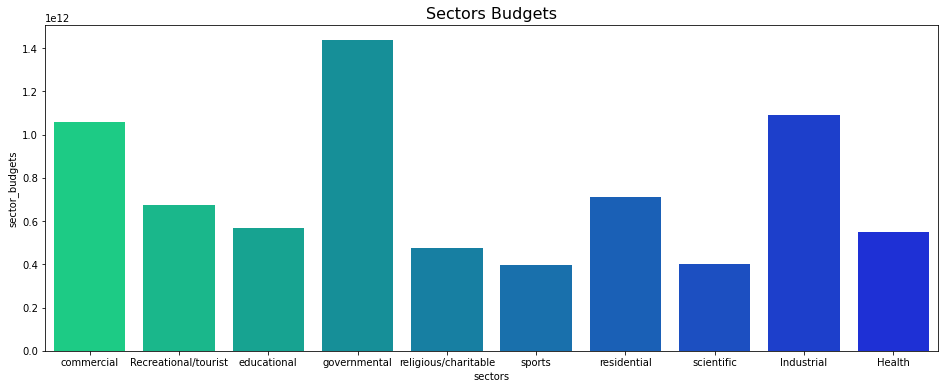

In [54]:
plt.figure(figsize=(16, 6))
sns.barplot(x='sectors', y='sector_budgets', data= data2 , palette='winter_r');
plt.title('Sectors Budgets',fontsize=16);

- Comparison of project sectors in relation to the budget

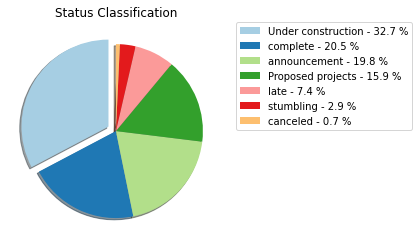

In [55]:
# explore the precent of each status

labels = data2["status_project"].unique()
sizes =  data2["status_project"].value_counts().values
explode=[0.1,0,0,0,0,0,0]
parcent = 100.*sizes/ sizes.sum()
labels = ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(labels, parcent)]

#colors = ['yellowgreen', 'gold', 'lightblue', 'lightcoral','blue']
colors = sns.color_palette("Paired", 10)
patches, texts= plt.pie(sizes, colors=colors, explode=explode, shadow=True,startangle=90)
plt.legend(patches, labels,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



plt.title("Status Classification");
plt.show();

- The percentage of project cases, and it is clear that 32.7% is under construction.

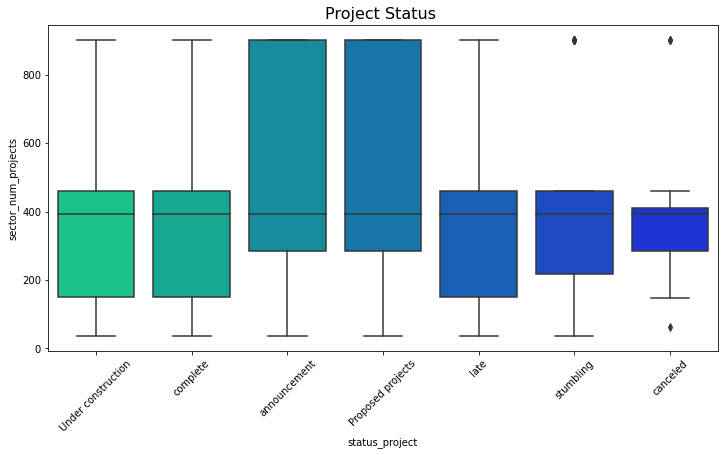

In [56]:
# Here we explore the relationship between status_project and sector number projects:

plt.figure(figsize = (12, 6));
sns.boxplot(x = 'status_project', y = 'sector_num_projects',  data = data2, palette='winter_r' );
xt = plt.xticks(rotation=45);
plt.title('Project Status ',fontsize=16);

- boxplot for project status 

In [57]:
d2=alt.Chart(data2).mark_bar().encode(
    x='region_project',
    y='sum(budget_project)',
    color='sectors').interactive().properties(title="region_project and budget_project")

d2

alt.Chart(...)

- We can see that Riyadh is the highest city in projects

In [58]:
sa

alt.Chart(...)

- here also we can see that Riyadh is the highest city in price per meter in aqar dataset.

### Some of the projects in  Riyadh city

### King Abdullah Financial District

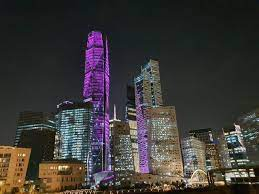



### Digital City
<img src="https://i.ytimg.com/vi/BHvveln9EBg/maxresdefault.jpg" width="300" height="100">

### Green Riyadh
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQLR4p24PsUtWVocbrgcw65gUcKYA8u86sPLw&usqp=CAU" width="300" height="100">

## Conclusion


- We saw that Riyadh got the highest prices in terms of land prices
- The largest percentage of the land was residential lands
- North of the  Riyadh got 67.87% from land prices 
- In Saudi projects, government projects were the highest in terms of budgets
- The total number of completed projects was 20.5%.
- Riyadh got the largest share of Saudi projects
- We can say that one of the reasons that made the land prices in Riyadh so high is the number of huge projects established in Riyadh, on which the total expenditure amounted to 4 billion riyals.
  
  